# code for benin-malanville.csv i have done some basic cleaning tasks like remove column with null value since we don't use them  i check duplicate columns before going to actual tasks and others cleaning tasks then i go to EDA asks i try to put comment in every postion to make it easily redable to non-technical as well technical persons .


In [1]:

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
df = pd.read_csv('C:/Users/natiy/.jupyter/Energy-Solutions/Data/togo-dapaong_qc.csv')

In [3]:
#First We need to look the dimensions of the dataset to get basic understanding about it 
print("Shape of the dataset:", df.shape)

Shape of the dataset: (525600, 19)


In [4]:
# Check for null values in each column 
columns_with_null = df.columns[df.isnull().any()]
# Drop columns with null values
df = df.drop(columns_with_null, axis=1)
# Display the updated dataset
print("Updated Dataset:")
print(df)

Updated Dataset:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev     WD

In [5]:
# Check for duplicate rows
df.duplicated().sum()

# Drop duplicate rows
df = df.drop_duplicates()

In [6]:
# Select the columns of interest
columns_of_interest = ['GHI', 'DNI', 'DHI']
# Calculate z-scores for the selected columns
z_scores = stats.zscore(df[columns_of_interest])
# Remove rows with z-score less than 3
filtered_df = df[(z_scores >= 3).all(axis=1)]
# Display the filtered dataset
print("Filtered Dataset:")
print(filtered_df)

Filtered Dataset:
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []


In [7]:

# Calculate descriptive statistics for each numeric column
numeric_columns = df.select_dtypes(include='number')

statistics = pd.DataFrame(columns=['Column', 'Mean', 'Mode', 'Median', 'Std Deviation', 'Range', 'Variance', '1st Quartile', '2nd Quartile', '3rd Quartile'])
for column in numeric_columns:
    column_stats = {
        'Column': column,
        'Mean': df[column].mean(),
        'Mode': df[column].mode().values[0],
        'Median': df[column].median(),
        'Std Deviation': df[column].std(),
        'Range': df[column].max() - df[column].min(),
        'Variance': df[column].var(),
        '1st Quartile': df[column].quantile(0.25),
        '2nd Quartile': df[column].quantile(0.50),
        '3rd Quartile': df[column].quantile(0.75)
    }
    statistics = pd.concat([statistics, pd.DataFrame([column_stats])], ignore_index=True)

# Display the statistics
print(statistics)



C:\Users\natiy\AppData\Local\Temp\ipykernel_24620\662035645.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  statistics = pd.concat([statistics, pd.DataFrame([column_stats])], ignore_index=True)


           Column        Mean   Mode  Median  Std Deviation   Range  \
0             GHI  230.555040   -1.9     2.1     322.532347  1436.7   
1             DNI  151.258469    0.0     0.0     250.956962  1004.5   
2             DHI  116.444352    0.0     2.5     156.520714   805.7   
3            ModA  226.144375    0.0     4.4     317.346938  1380.0   
4            ModB  219.568588    0.0     4.3     307.932510  1367.0   
5            Tamb   27.751788   23.6    27.2       4.758023    26.5   
6              RH   55.013160   16.1    59.3      28.778732    96.5   
7              WS    2.368093    0.0     2.2       1.462668    16.1   
8          WSgust    3.229490    2.6     2.9       1.882565    23.1   
9         WSstdev    0.557740    0.4     0.5       0.268923     4.7   
10             WD  161.741845    0.0   199.1      91.877217   360.0   
11        WDstdev   10.559568    0.0    10.8       5.915490    86.9   
12             BP  975.915242  976.0   976.0       2.153977    15.0   
13    

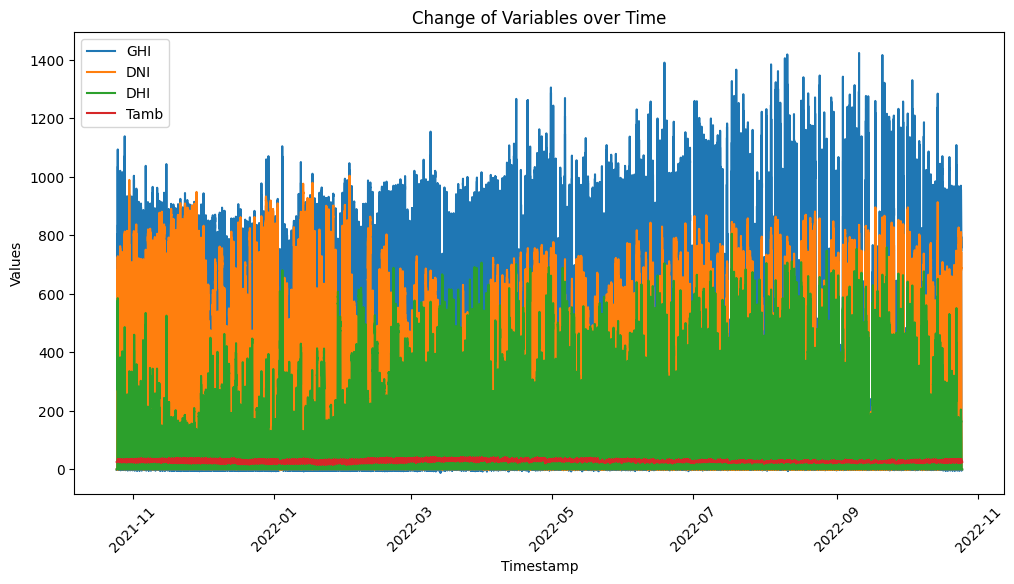

In [8]:
# Time Series Analysis 
#Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Change of Variables over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [9]:
# Select the columns of interest
columns_of_interest = ['GHI', 'DHI', 'DNI', 'TModA', 'TModB']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
            GHI       DHI       DNI     TModA     TModB
GHI    1.000000  0.852080  0.877293  0.898211  0.919220
DHI    0.852080  1.000000  0.532717  0.802319  0.820360
DNI    0.877293  0.532717  1.000000  0.765881  0.783572
TModA  0.898211  0.802319  0.765881  1.000000  0.985069
TModB  0.919220  0.820360  0.783572  0.985069  1.000000


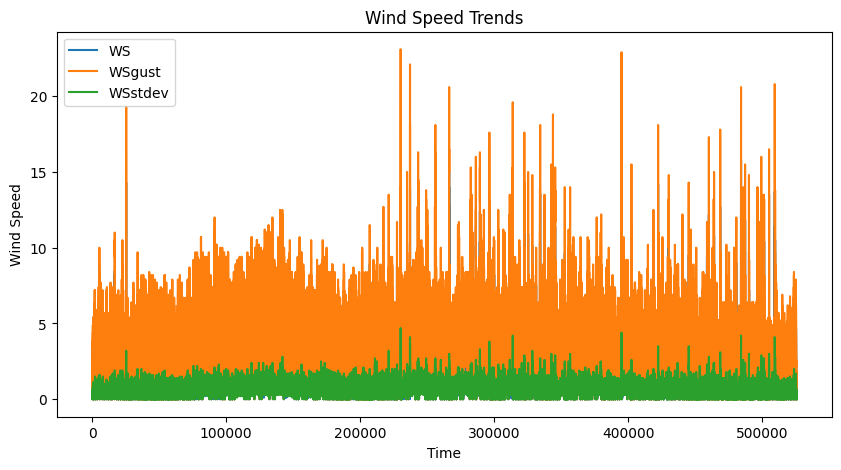

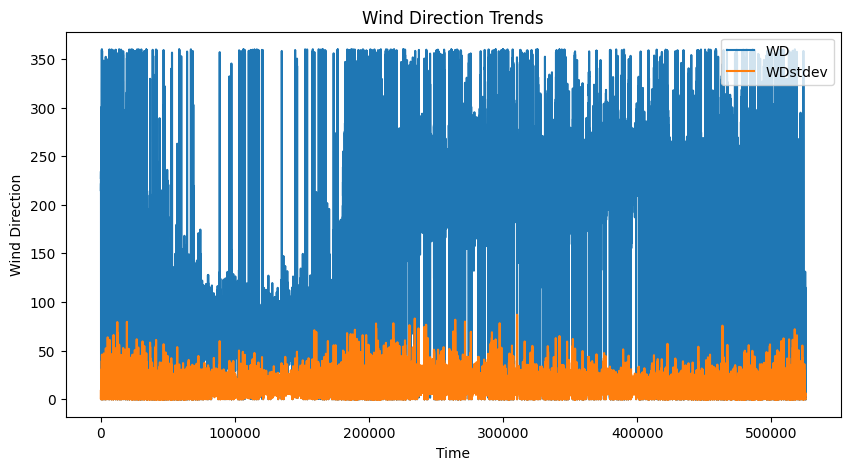

In [10]:
# Extract the columns of interest
wind_speed_columns = ['WS', 'WSgust', 'WSstdev']
wind_direction_columns = ['WD', 'WDstdev']

# Plot wind speed trends
plt.figure(figsize=(10, 5))
for column in wind_speed_columns:
    plt.plot(df[column], label=column)
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.title('Wind Speed Trends')
plt.legend()
plt.show()

# Plot wind direction trends
plt.figure(figsize=(10, 5))
for column in wind_direction_columns:
    plt.plot(df[column], label=column)
plt.xlabel('Time')
plt.ylabel('Wind Direction')
plt.title('Wind Direction Trends')
plt.legend()
plt.show()

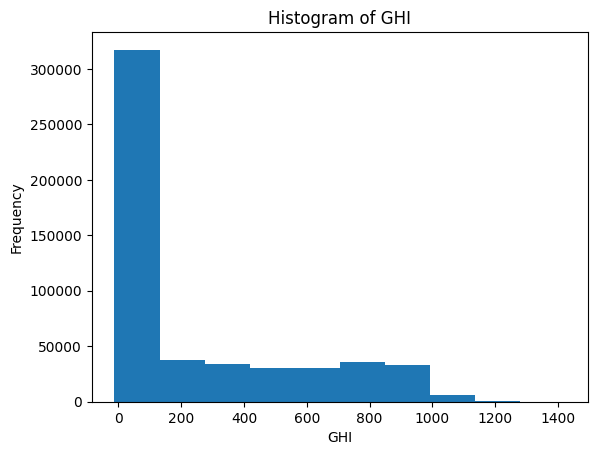

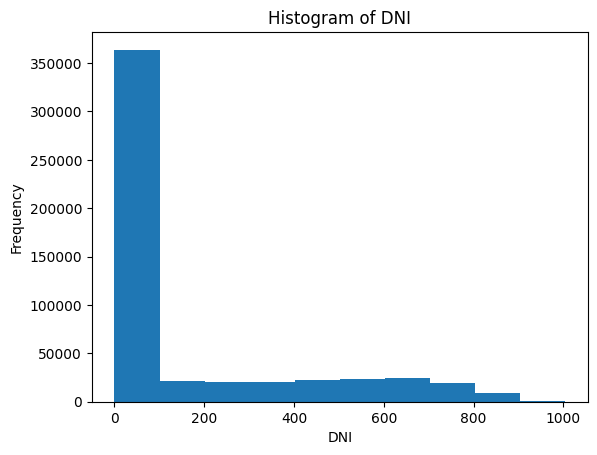

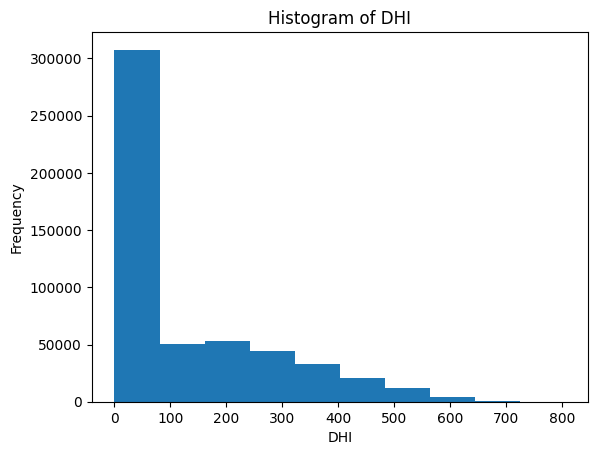

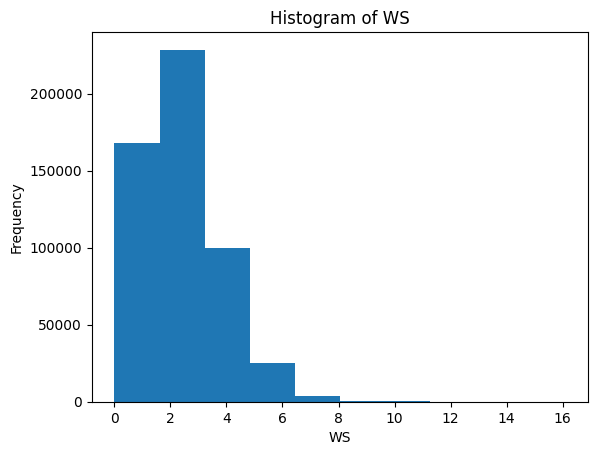

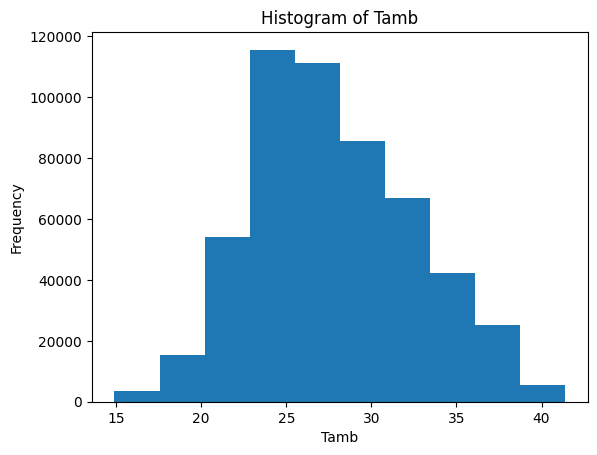

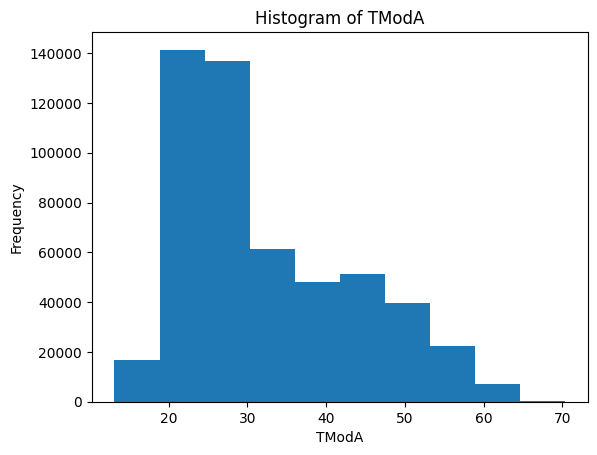

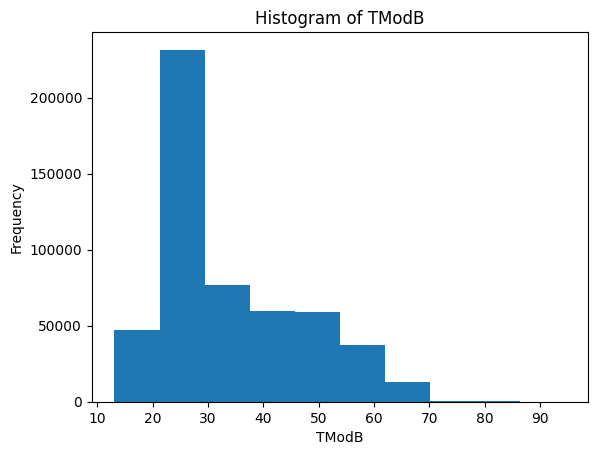

In [11]:

# Select specific columns for histogram
columns = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']

# Create histograms for each selected column
for column in columns:
    plt.hist(df[column], bins=10)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

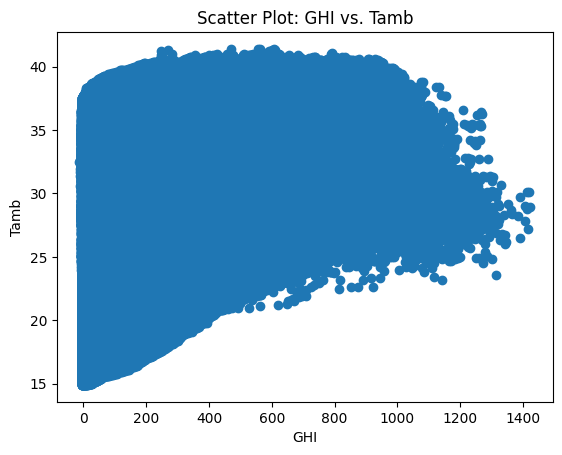

In [12]:
# Generate a scatter plot for GHI vs. Tamb
plt.scatter(df['GHI'], df['Tamb'])

# Add labels and title
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Scatter Plot: GHI vs. Tamb')

# Display the scatter plot
plt.show()

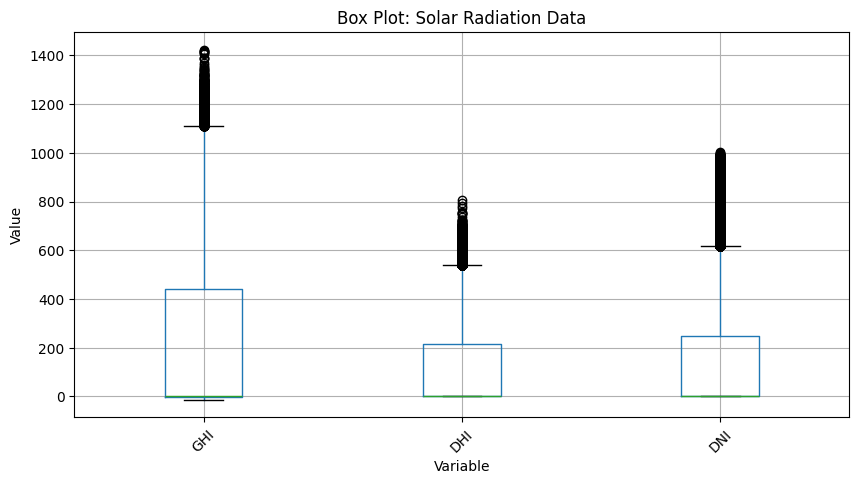

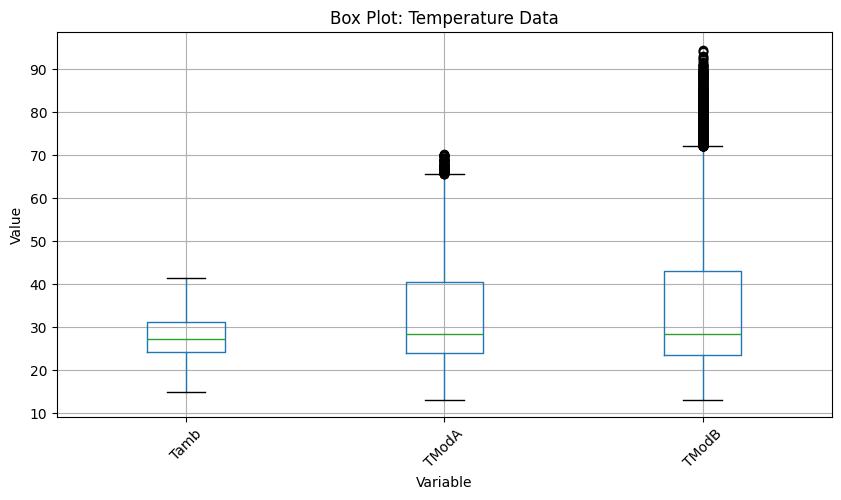

In [13]:
# Select the columns of interest
solar_radiation_columns = ['GHI', 'DHI', 'DNI']
temperature_columns = ['Tamb', 'TModA', 'TModB']

# Create box plots for solar radiation data
plt.figure(figsize=(10, 5))
df[solar_radiation_columns].boxplot()
plt.title('Box Plot: Solar Radiation Data')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

# Create box plots for temperature data
plt.figure(figsize=(10, 5))
df[temperature_columns].boxplot()
plt.title('Box Plot: Temperature Data')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()